In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.neural_network
import sklearn.model_selection
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Descripción del Dataset

El dataset tiene 129 dimensiones y 2230 instancias. El número de clases es 6. Las dimensiones corresponden a 129 parametros internos de un detector de gases y las 6 clases a 6 diferentes tipos de gases 1: Ethanol; 2: Ethylene; 3: Ammonia; 4: Acetaldehyde; 5: Acetone; 6: Toluene

In [2]:
data = pd.read_csv("data_gas_3.csv")

In [3]:
#El dataset reune información de un sensor de gases e identifica 6 gases con 129 parametros internos.
#los gases están numerados en el dataset de la siguiene manera:
#1: Ethanol; 2: Ethylene; 3: Ammonia; 4: Acetaldehyde; 5: Acetone; 6: Toluene

gases = np.array(['','Ethanol', 'Ethylene', 'Ammonia', 'Acetaldehyde', 'Acetone', 'Toluene'])

data = data.drop(['U'],axis=1)
X = data.drop(['Gas'],axis=1)
Y = data['Gas']

In [4]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

In [5]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
N_train = len(x_train)
N_test = len(x_test)

# Experimento 1: Función de activación softmax

In [7]:
f1_score_train = []
f1_score_test = []

n_data_train = []
n_data_test = []




for i in range(10):
    
    n_train = N_train*(i+1)*0.1
    n_test = N_test*(i+1)*0.1
    
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                                   hidden_layer_sizes=(4,4,4), 
                                                   max_iter=3000)
    mlp.fit(x_train[:int(n_train),:], y_train[:int(n_train)])
    
    f1_score_train.append(sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))

    f1_score_test.append(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))
    
    
    n_data_train.append(n_train)
    n_data_test.append(n_test)
    

    

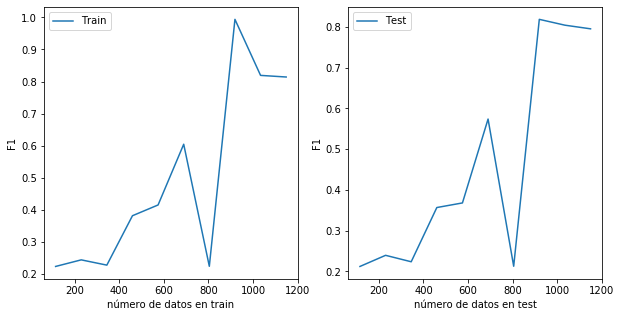

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_data_train,f1_score_train, label = "Train")
plt.xlabel("número de datos en train")
plt.ylabel("F1")
plt.legend()
plt.subplot(1,2,2)
plt.plot(n_data_test,f1_score_test, label = "Test")
plt.xlabel("número de datos en test")
plt.ylabel("F1")
plt.legend()

# Experimento 2: Función de activación ReLu

In [9]:
f1_score_train_relu = []
f1_score_test_relu = []

n_data_train_relu = []
n_data_test_relu = []




for i in range(10):
    
    n_train = N_train*(i+1)*0.1
    n_test = N_test*(i+1)*0.1
    
    mlp = sklearn.neural_network.MLPClassifier(activation='relu', 
                                                   hidden_layer_sizes=(4,4,4), 
                                                   max_iter=3000)
    mlp.fit(x_train[:int(n_train),:], y_train[:int(n_train)])
    
    f1_score_train_relu.append(sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))

    f1_score_test_relu.append(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))
    
    
    n_data_train_relu.append(n_train)
    n_data_test_relu.append(n_test)
    

    

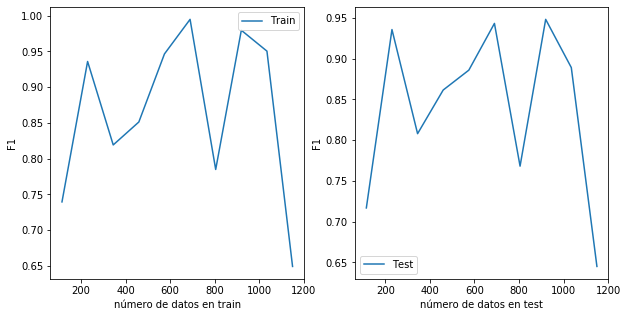

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_data_train_relu,f1_score_train_relu, label = "Train")
plt.xlabel("número de datos en train")
plt.ylabel("F1")
plt.legend()
plt.subplot(1,2,2)
plt.plot(n_data_test_relu,f1_score_test_relu, label = "Test")
plt.xlabel("número de datos en test")
plt.ylabel("F1")
plt.legend()

# Experimento 3: Variando alfa

In [50]:
f1_score_train_alfa = []
f1_score_test_alfa = []
#alfa = []

alfa = (np.logspace(1,6,10))/10000

for i in alfa:
    
   
    
    mlp = sklearn.neural_network.MLPClassifier(activation='relu', alpha=i, 
                                                   hidden_layer_sizes=(4,4,4), 
                                                   max_iter=3000)
    mlp.fit(x_train, y_train)
    
    f1_score_train_alfa.append(sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))

    f1_score_test_alfa.append(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))
   # alfa.append(alpha)
    
    
    

    



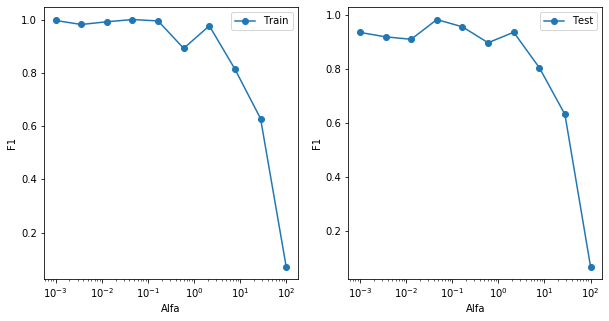

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(alfa,f1_score_train_alfa, marker='o', label = "Train")
plt.xscale('log')
plt.xlabel("Alfa")
plt.ylabel("F1")
plt.legend()
plt.subplot(1,2,2)
plt.plot(alfa,f1_score_test_alfa,marker ='o', label = "Test")
plt.xscale('log')
plt.xlabel("Alfa")
plt.ylabel("F1")
plt.legend()

# Comentarios

1. En el experimento 1, con la función softmax el F1 tiende a aumentar a medida que aumenta el número de instancias tanto para train como para test. El comportamiento es similar para ambos grupos de datos. En número de datos para train y test es 1150. El máximo se alcanza para cerca de 900 instancias. Si tomamos el primer máximo como el número optimo de instancias, entonces con cerca de 650 datos para train y test se obtendría el mejor f1 cercano a 0.6.

2. Por otro lado, en el experimento 2 con la función de activación ReLu, con 110 datos ya es suficiente para obtener un F1 cercano a 0.7 y con 220 datos el F1 score aumenta a 0.94 tanto en test como train. Sin embargo al usar la totalidad de datos en ambos casos el F1 decae a 0.65.

3. En el experimento 3, variando alpha, el mejor F1 (entre 1 y 0.9) se obtiene para valores bajos de alfa, es decir, para valores por debajo de alpha = 0.1. A partir de alpha = 0.1 el valor de F1 disminuye llegando a un valor mínimo de 0.1 cuando alpha = 100